<a href="https://colab.research.google.com/github/vinutha-AM/GRIP-TASK/blob/main/GRIP_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Spark Foundation** - Data Science & Business Analytics Internship
#TASK 1 - Prediction using Supervised Machine Learning
#Predict the percentage of an student based on the number of study hours.

*Submitted by Vinutha A M*

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Reading the data
data = pd.read_csv('http://bit.ly/w-data')
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [ ]:
#To check for null value in the dataset
data.isnull == True

False

**Since there is no null value, we can visualize the dataset.**

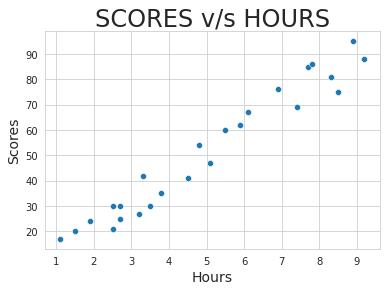

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x=data['Hours'], y=data['Scores'])
plt.title('SCORES v/s HOURS', size=24)
plt.xlabel('Hours', size=14)
plt.ylabel('Scores', size=14)
plt.show()

**From the above scatterplot we can devise that there is a relation between Scores and Hours, inorder to confirm our understanding, we will plot a regression line to confirm the same.**

Text(0.5, 1.0, 'REGRESSION GRAPH')

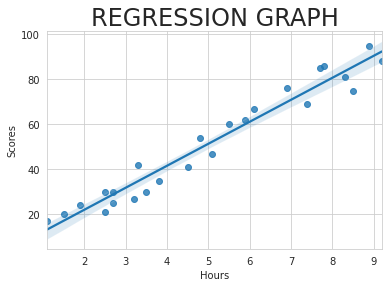

In [ ]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('REGRESSION GRAPH', size=24)


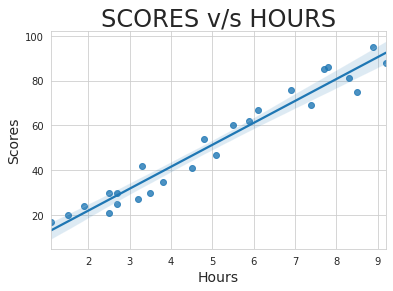

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('SCORES v/s HOURS', size=24)
plt.xlabel('Hours', size=14)
plt.ylabel('Scores', size=14)
plt.show()
print(data.corr())

**It is confirmed that 'Scores' and 'Hours' are related.**

##**TRAINING THE MODEL**##
1. Splitting the data


In [ ]:
#Defining X and Y
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

#Splitting the data
train_x, val_x, train_y, val_y = train_test_split(x,y,random_state = 0)

2. Fitting data to the model

In [ ]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("---------Model Trained---------")

---------Model Trained---------


##**PREDICTION OF SCORES**##

In [ ]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


##**COMPARING PREDICTED MARKS WITH ACTUAL MARKS**##

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


1. Plotting graph of the same


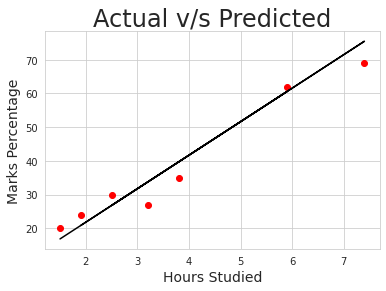

In [ ]:
plt.scatter(x=val_x, y=val_y, color='red')
plt.plot(val_x, pred_y, color='Black')
plt.title('Actual v/s Predicted', size=24)
plt.ylabel('Marks Percentage', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

##**EVALUATING THE MODEL**##

In [ ]:
# Calculating the accuracy of the model
from sklearn import metrics
print('Mean absolute error:', metrics.mean_absolute_error(val_y, pred_y))

Mean absolute error: 4.130879918502482


Since the mean absolute value error is minimal this means that the chances of error from the model are less.


##**PREDICTING THE SCORE**##

In [ ]:
hours=[9.25]
answer=regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.